In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [3]:
data = pd.read_csv('../../raw_data/bitstampUSD.csv')

In [4]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s', origin='unix')
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data = data[["Timestamp", "Open"]].fillna(method='ffill')
data.head()

,Timestamp,Open
0,2011-12-31 07:52:00,4.39
1,2011-12-31 07:53:00,4.39
2,2011-12-31 07:54:00,4.39
3,2011-12-31 07:55:00,4.39
4,2011-12-31 07:56:00,4.39


In [6]:
def open_diff_col(data):
    data['open_diff'] = data["Open"].diff()
    clean_data = data[1:]
    return clean_data

In [7]:
open_diff_col(data)

,Timestamp,Open,open_diff
1,2011-12-31 07:53:00,4.39,0.00
2,2011-12-31 07:54:00,4.39,0.00
3,2011-12-31 07:55:00,4.39,0.00
4,2011-12-31 07:56:00,4.39,0.00
5,2011-12-31 07:57:00,4.39,0.00
...,...,...,...
4727772,2020-12-30 23:56:00,28801.47,-7.60
4727773,2020-12-30 23:57:00,28829.42,27.95
4727774,2020-12-30 23:58:00,28850.49,21.07
4727775,2020-12-30 23:59:00,28910.54,60.05


In [8]:
data_sample = data[2701596:]
data_sample = data[2798175:]
data_test = data_sample[1829602:]
data_test

,Timestamp,Open,open_diff
4627777,2020-10-22 13:21:00,12941.63,-17.63
4627778,2020-10-22 13:22:00,12941.12,-0.51
4627779,2020-10-22 13:23:00,12955.46,14.34
4627780,2020-10-22 13:24:00,12959.98,4.52
4627781,2020-10-22 13:25:00,12959.01,-0.97
...,...,...,...
4727772,2020-12-30 23:56:00,28801.47,-7.60
4727773,2020-12-30 23:57:00,28829.42,27.95
4727774,2020-12-30 23:58:00,28850.49,21.07
4727775,2020-12-30 23:59:00,28910.54,60.05


## NaN Padding

In [42]:
# data_sample[500:550]

In [10]:
# data_sample['diff_open_close'] = data_sample['Open'] - data_sample['Close']

In [11]:
# plt.figure(figsize=(22,5))
# sns.lineplot(data=data_sample, x='Timestamp', y='diff_open_close')

In [12]:
# data_sample['diff_high_low'] = data_sample['High'] - data_sample['Low']

In [13]:
# plt.figure(figsize=(22,5))
# sns.lineplot(data=data_sample, x='Timestamp', y='diff_high_low')

In [14]:
# data_size = data_sample[:200]
# data_size.isnull().sum()

In [15]:
# data_test['new_close'] = data_size['Close'].values
data_test.insert(loc=2, column='New', value=['' for i in range(data_test.shape[0])])
data_test[550:600]

,Timestamp,Open,New,open_diff
4628327,2020-10-22 22:31:00,13160.48,,-8.02
4628328,2020-10-22 22:32:00,13160.66,,0.18
4628329,2020-10-22 22:33:00,13153.03,,-7.63
4628330,2020-10-22 22:34:00,13141.60,,-11.43
4628331,2020-10-22 22:35:00,13157.39,,15.79
4628332,2020-10-22 22:36:00,13155.77,,-1.62
4628333,2020-10-22 22:37:00,13157.06,,1.29
4628334,2020-10-22 22:38:00,13151.91,,-5.15
4628335,2020-10-22 22:39:00,13140.63,,-11.28
4628336,2020-10-22 22:40:00,13138.89,,-1.74


In [16]:
# def fill_blanks(row):
#     if (isinstance(row['Open'], float)):
#         row['New'] = row['Open']
#     elif (isinstance(row['Open'], str)):
#         row['New'] = row['Previous']
#     else:
#         row['New'] = ''
#     return row

In [17]:
# data_test = data_test.fillna('')
# data_test.head()

In [18]:
# clean_data = data_test.apply(fill_blanks, axis=1)

In [19]:
# clean_data[510:560]

In [20]:
# (clean_data['New'].values == '').sum()

## Dumb Baseline Model

In [47]:
baseline_sample = data_sample[:10000]
baseline_sample.head()

,Timestamp,Open,open_diff
2798175,2017-04-30 23:59:00,1350.21,1.32
2798176,2017-05-01 00:00:00,1348.88,-1.33
2798177,2017-05-01 00:01:00,1352.41,3.53
2798178,2017-05-01 00:02:00,1349.49,-2.92
2798179,2017-05-01 00:03:00,1350.11,0.62


In [48]:
# baseline = baseline_sample[['Open']]
# baseline['Previous'] = baseline['Open'].shift(1)
# baseline['outcome'] = baseline['Open']- baseline['Previous']
# # baseline.insert(loc=3, column='Coded', value=['' for i in range(baseline.shape[0])])
# baseline = baseline.fillna(method='ffill')

In [52]:
f = lambda x: 0 if x <= 0 else 1
baseline_sample['open_diff_coded'] = baseline_sample['open_diff'].map(f)

<ipython-input-52-17acf7c6ea0c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baseline_sample['open_diff_coded'] = baseline_sample['open_diff'].map(f)


In [53]:
base = baseline_sample[['open_diff_coded']]
base.head()

,open_diff_coded
2798175,1
2798176,0
2798177,1
2798178,0
2798179,1


In [54]:
train_size = 0.6
index = round(train_size*base.shape[0])
df_train = base.iloc[:index]
df_test = base.iloc[index+1:]

In [55]:
y_pred = df_test.shift(1).dropna()
y_true = df_test[1:]
print(f"Accuracy:{accuracy_score(y_true, y_pred)}")

Accuracy:0.48724362181090547


## Simple LogReg

In [27]:
baseline_sample = data_sample[:10000]
baseline_sample.head()

,Timestamp,Open,open_diff
2798175,2017-04-30 23:59:00,1350.21,1.32
2798176,2017-05-01 00:00:00,1348.88,-1.33
2798177,2017-05-01 00:01:00,1352.41,3.53
2798178,2017-05-01 00:02:00,1349.49,-2.92
2798179,2017-05-01 00:03:00,1350.11,0.62


In [28]:
def input_data(data, sample_size, shift_size, train_size):

    data_size = data.shape[0]
    sample = data.iloc[(data_size-sample_size):data_size]
    sample_pp = sample[['Open', 'Timestamp']].set_index("Timestamp").fillna(method='ffill')


    for i in range(1, shift_size+1):
        sample_pp[f't - {i}'] = sample_pp['Open'].shift(i)
    sample_shifted = sample_pp.dropna() 


    X = sample_shifted.drop(columns=['Open'])
    y = sample_shifted['Open']


    X_train = X.iloc[0:train_size]
    y_train = y.iloc[0:train_size]
    X_test = X.iloc[(train_size+1):(sample_size-shift_size)]
    y_test = y.iloc[(train_size+1):(sample_size-shift_size)]
    
    return X_train, X_test, y_train, y_test

In [29]:
X_train, X_test, y_train, y_test = input_data(baseline_sample, 100, 5, 60)

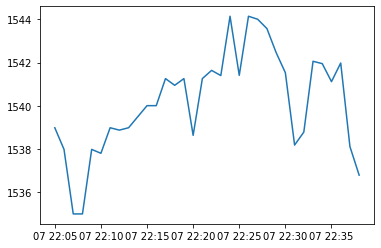

In [30]:
plt.plot(y_test)

In [31]:
y_train[-1]

1535.62

In [32]:
y_shift = y_test.shift(1)
y_shift[0] = y_train[-1]
y_true = y_test- y_shift

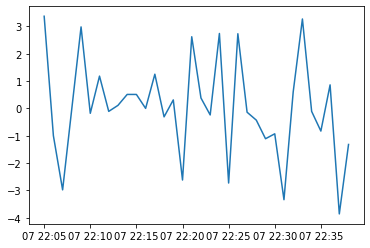

In [33]:
plt.plot(y_true)

In [34]:
f = lambda x: 0 if x <= 0 else 1
y_pred = y_true.map(f)
y_pred 

Timestamp
2017-05-07 22:05:00    1
2017-05-07 22:06:00    0
2017-05-07 22:07:00    0
2017-05-07 22:08:00    0
2017-05-07 22:09:00    1
2017-05-07 22:10:00    0
2017-05-07 22:11:00    1
2017-05-07 22:12:00    0
2017-05-07 22:13:00    1
2017-05-07 22:14:00    1
2017-05-07 22:15:00    1
2017-05-07 22:16:00    0
2017-05-07 22:17:00    1
2017-05-07 22:18:00    0
2017-05-07 22:19:00    1
2017-05-07 22:20:00    0
2017-05-07 22:21:00    1
2017-05-07 22:22:00    1
2017-05-07 22:23:00    0
2017-05-07 22:24:00    1
2017-05-07 22:25:00    0
2017-05-07 22:26:00    1
2017-05-07 22:27:00    0
2017-05-07 22:28:00    0
2017-05-07 22:29:00    0
2017-05-07 22:30:00    0
2017-05-07 22:31:00    0
2017-05-07 22:32:00    1
2017-05-07 22:33:00    1
2017-05-07 22:34:00    0
2017-05-07 22:35:00    0
2017-05-07 22:36:00    1
2017-05-07 22:37:00    0
2017-05-07 22:38:00    0
Name: Open, dtype: int64

In [35]:
def y_test_encoding(y_test, y_train):
    y_shift = y_test.shift(1)
    y_shift[0] = y_train[-1]
    y_true = y_test- y_shift
    f = lambda x: 0 if x <= 0 else 1
    y_pred = y_true.map(f)
    return y_pred

In [36]:
def y_train_encoding(y_train):
    y_shift = y_train.shift(1)
    y_shift[0] = y_shift[1]
    y = y_train- y_shift
    f = lambda x: 0 if x <= 0 else 1
    y_train_coded = y.map(f)
    return y_train_coded

In [37]:
y_pred = y_test_encoding(y_test, y_train)
y_train_coded = y_train_encoding(y_train)

In [38]:
type(y_pred), type(y_train_coded)

(pandas.core.series.Series, pandas.core.series.Series)

In [39]:
log_reg = LogisticRegression()
log_reg = log_reg.fit(X_train, y_train_coded)
results = log_reg.predict(X_test)

In [40]:
score = log_reg.score(X_test, y_pred)
score

0.5882352941176471

In [41]:
print(f"Accuracy:{accuracy_score(y_pred, results)}")

Accuracy:0.5882352941176471
